In [1]:
include("../src/dependencies.jl");

In [2]:
#---- parameters
param = ( μ  = .1,
            ϵ  = 1,
            N  = 2^12,  # number of collocation points
            L  = 10,    # size of the mesh (-L,L)
            T  = 5,     # final time of computation
            dt = 0.001, # timestep
            ns = 50,    # data stored every ns step
                );

In [3]:
#---- initial data
g(x) = exp.(-abs.(x).^4);
z(x) = 0*exp.(-x.^2);
init = Init(g,z);

In [4]:
#---- models to compare
models=[]
push!(models,WaterWaves(param))
push!(models,PseudoSpectral(param;order=2,dealias=1,lowpass=1/100))
push!(models,PseudoSpectral(param;order=3,dealias=1,lowpass=1/100))
problems = []
for model in models
	push!(problems, Problem(model, init, param) )
end

┌ Info: solving system with nonlinearity of order 2
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/PseudoSpectral.jl:55
┌ Info: dealiasing
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/PseudoSpectral.jl:76
┌ Info: solving system with nonlinearity of order 3
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/PseudoSpectral.jl:55
┌ Info: dealiasing
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/PseudoSpectral.jl:76
┌ Warning: The fix point algorithm converged in 198 iterations
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:124


In [5]:
#---- computation
for problem in problems
    solve!( problem )
end

┌ Info: 
│ Now solving the model water waves
│ with parameters
│ (μ = 0.1, ϵ = 1, N = 4096, L = 10, T = 5, dt = 0.001, ns = 50)
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:65
Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
┌ Info: 
│ Now solving the model WW2
│ with parameters
│ (μ = 0.1, ϵ = 1, N = 4096, L = 10, T = 5, dt = 0.001, ns = 50)
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:65
Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
┌ Info: 
│ Now solving the model WW3
│ with parameters
│ (μ = 0.1, ϵ = 1, N = 4096, L = 10, T = 5, dt = 0.001, ns = 50)
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:65
Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:01:43


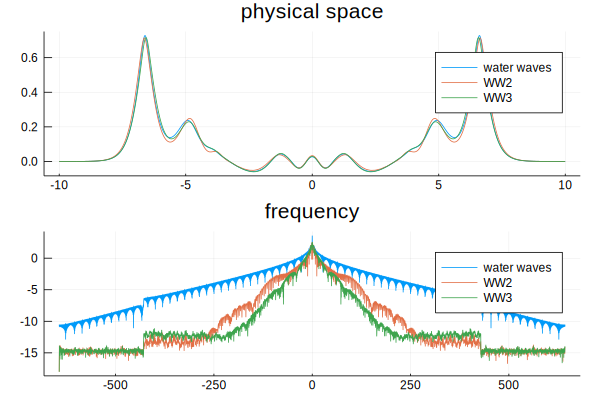

In [16]:
#---- final time
p = plot(layout=(2,1));
for problem in problems
   	fig_problem!( p, problem)
end
p

In [15]:
Ns=problems[1].times.Ns
ts=problems[1].times.ts
prog = Progress(Ns;dt=1,desc="Creating animation: ")

@gif for t in range(1, stop=Ns-1)
    plt = plot(layout=(2,1))
    for problem in problems
        fig_problem!( plt, problem, ts[t])
    end
    ylims!(plt[1],-0.1,1)
    next!(prog) # increment the progress bar
end

Creating animation:  97%|██████████████████████████████ |  ETA: 0:00:00┌ Info: Saved animation to 
│   fn = /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/animation.jl:90


Plots.AnimatedGif("/Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/tmp.gif")